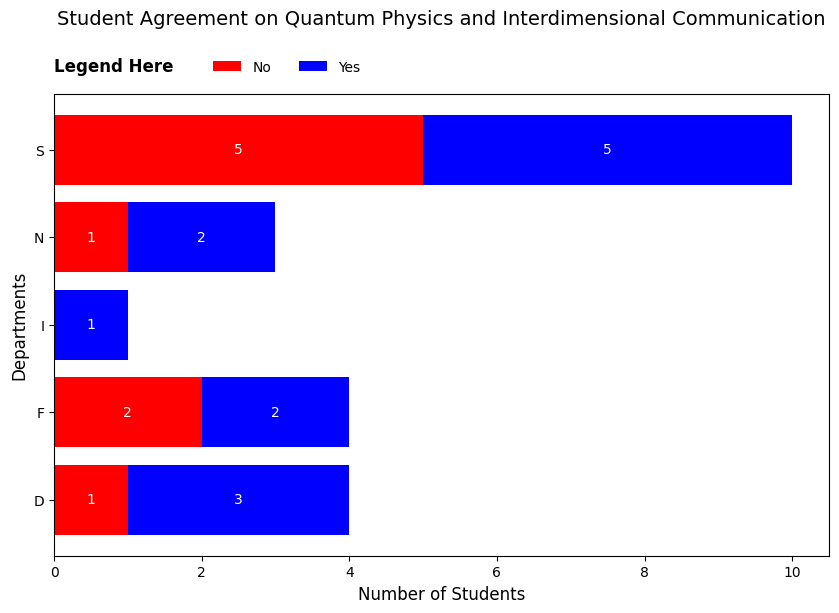

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:/Users/USER/Documents/3rd year 2nd sem/Data Analytics/Assignment_2_Data_Analytics/data/bar_assignment.csv")

data_dict = {}
for _, row in df.iterrows():
    label = row["LABEL"]
    count = row["COUNT"]
    if label not in data_dict:
        data_dict[label] = {"yes": 0, "no": 0}
    if count == 1:
        data_dict[label]["yes"] += 1
    else:
        data_dict[label]["no"] += 1

departments = list(data_dict.keys())
yes_responses = [data_dict[label]["yes"] for label in departments]
no_responses = [data_dict[label]["no"] for label in departments]

y_positions = np.arange(len(departments))

plt.figure(figsize=(10, 6))

bars_no = plt.barh(y_positions, no_responses, color='red', label="No")
bars_yes = plt.barh(y_positions, yes_responses, left=no_responses, color='blue', label="Yes")

plt.xticks(fontsize=10)
plt.yticks(y_positions, departments, fontsize=10)

plt.title("Student Agreement on Quantum Physics and Interdimensional Communication", fontsize=14, pad=50)
plt.text(0, len(departments) - 0.05, "Legend Here", fontsize=12, fontweight='bold', va='center')
plt.legend(fontsize=10, title_fontsize=12, loc='upper center', bbox_to_anchor=(0.3, 1.1), ncol=2, frameon=False)
plt.xlabel("Number of Students", fontsize=12)
plt.ylabel("Departments", fontsize=12)

for i in range(len(departments)):
    if no_responses[i] > 0:
        plt.text(no_responses[i] / 2, y_positions[i], str(no_responses[i]),
                 va='center', ha='center', fontsize=10, color='white')
    if yes_responses[i] > 0:
        plt.text(no_responses[i] + yes_responses[i] / 2, y_positions[i],
                 str(yes_responses[i]), va='center', ha='center', fontsize=10, color='white')

plt.show()

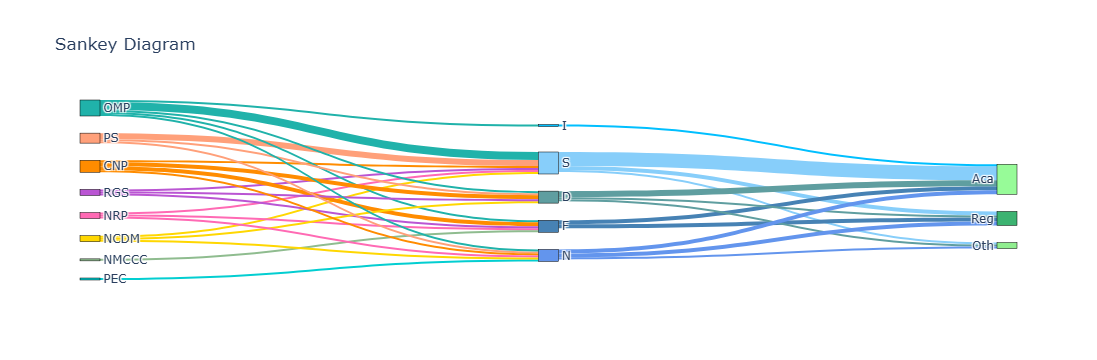

In [2]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv("C:/Users/USER/Documents/3rd year 2nd sem/Data Analytics/Assignment_2_Data_Analytics/data/sankey_assignment.csv")

left_labels = df.columns[1:9]  
right_labels = df.columns[9:]  
middle_labels = df["LABEL"].tolist()

labels = list(left_labels) + middle_labels + list(right_labels)
label_to_index = {label: i for i, label in enumerate(labels)}

sources = []
targets = []
values = []

for _, row in df.iterrows():
    mid_label = row["LABEL"]
   
    for left in left_labels:
        flow_value = row[left]
        if flow_value > 0:
            sources.append(label_to_index[left])
            targets.append(label_to_index[mid_label])
            values.append(flow_value)
  
    for right in right_labels:
        flow_value = row[right]
        if flow_value > 0:
            sources.append(label_to_index[mid_label])
            targets.append(label_to_index[right])
            values.append(flow_value)

colors = {
    "OMP": "#20b2aa",
    "PS": "#ffa07a",
    "CNP": "#ff8c00",
    "RGS": "#ba55d3",
    "NRP": "#ff6ab4",
    "NCDM": "#ffd701",
    "NMCCC": "#8fbc8f",
    "PEC": "#02ced1",
    "S": "#87cefa",
    "I": "#00bfff",
    "D": "#5f9ea0",
    "F": "#4782b4",
    "N": "#6395ed",
    "Aca": "#97fb98",
    "Reg": "#3cb371",
    "Oth": "#90ee8f"
}

node_colors = [colors[label] for label in labels]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=[node_colors[src] for src in sources]  
    )
))

fig.update_layout(
    title_text="Sankey Diagram",
    font_size=12
)

fig.show()